# Assignment: Decision Trees and Random Forests
The objectives of this assignment are:
- to learn to use decision trees to build a transparent, human-readable predictive model.
- to learn to use random forests for improved predictive performance.

## Business Understanding
In this example we will demonstrate how to determine if website is malicious or not based on several different features in the dataset. 

In [12]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import confusion_matrix


# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
data = phishing_websites.data.original



##  Data Understanding
The dataset consists of multiple different values which correspond to the websites features.
To determine if a website is malicious or not, we can take a look at features such as:

- Url length
- Usage of shortening services
- Double slash redirecting
- Having sub domain
- Validating SSL certificates

These are only a few included in the datasets. Most importantly the target value is "Result" which indicates if the website is malicious or not. (1) malicious (2) safe.



In [13]:
data.head()

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


## Data Preparation
Now that we know what the data looks like, we can prepare it for modeling. 
Below we seperate feature and target.

In [14]:

#FEATURE
X = data.drop(['result'], axis = 1)

#TARGET
y = data['result'].astype('category')

## Modeling
Now that the data has been prepared, we will choose the model, train it and visualize the tree. Specific methodologies used will be gone through later.

First we will split the data:
- 75% for training
- 25% for testing


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20) # extract test set
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8291, 30) (2764, 30) (8291,) (2764,)


Now that the data has been splitted, next step is to choose an algorithm for our model. For our task we chose Decision tree.


In [16]:
model = DecisionTreeClassifier(max_depth=2, random_state=20)

Next we will train our model using training data.


In [ ]:
model.fit(X_train, y_train)

Finally we will visualize the decision tree.

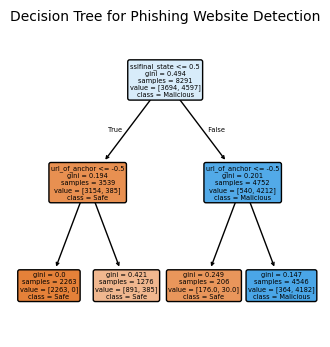

In [18]:

fig = plt.figure(figsize = (4, 4))
plot_tree(model, feature_names = X.keys(), class_names = ['Safe', 'Malicious'], filled = True, rounded = True)
plt.title("Decision Tree for Phishing Website Detection", fontsize = 10)
plt.show()


## Evaluation

In [19]:

preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[1095,  109],
       [ 148, 1412]])

## Deployment